# Project Stage III

### Import necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import poisson
from IPython.display import Image
from plotly.subplots import make_subplots

# Graphically plot the distribution and describe the distribution statistics

### North Carolina distribution

In [2]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
nc_cases = cases[cases["State"] == "NC"]
selected_date_columns = [col for col in nc_cases.columns if '2020-07-01' <= col <= '2020-12-31']
nc_cases = nc_cases[selected_date_columns]
nc_cases.head()

,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,3,3,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,1,38,82
1924,1151,1179,1207,1240,1274,1292,1309,1319,1357,1388,...,9509,9509,9509,9509,9509,9509,10120,10164,10274,10397
1925,93,101,105,112,118,124,134,138,140,149,...,2367,2367,2367,2367,2367,2367,2526,2564,2642,2662
1926,32,36,36,36,37,37,37,37,39,41,...,558,558,558,558,558,558,611,619,633,638
1927,132,138,142,148,149,155,162,171,176,182,...,1284,1284,1284,1284,1284,1284,1380,1383,1402,1407


In [4]:
# July 1, 2020 is a Wednesday
count = 6
weekly_cases_nc = [] # where Wednesday from each week is chosen
for col in nc_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nc.append(nc_cases[col].sum())
weekly_cases_nc_data = pd.Series(weekly_cases_nc)

### Graphically plot the distribution and describe the distribution statistics

<Axes: >

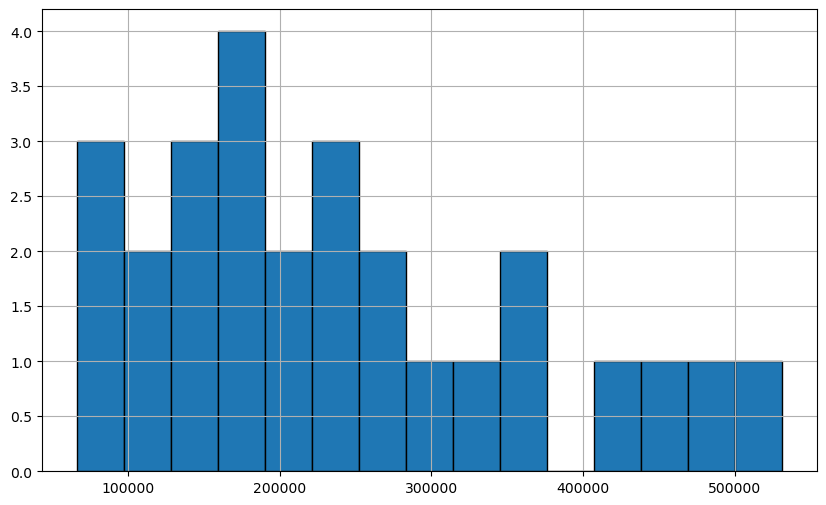

In [5]:
weekly_cases_nc_data.hist(bins=15, ec='black', figsize=(10, 6))

### Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis)

In [6]:
mean = weekly_cases_nc_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_nc_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_nc_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_nc_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_nc_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 239380.59
The Median is: 210629.00
The Variance is: 16396212258.33
The Skew is: 0.7593
The Kurtosis is: -0.2102

 We have a Skewed right distribution


## Compare the North Carolina distribution and its statistics to 5 other states

### New York distribution

<Axes: >

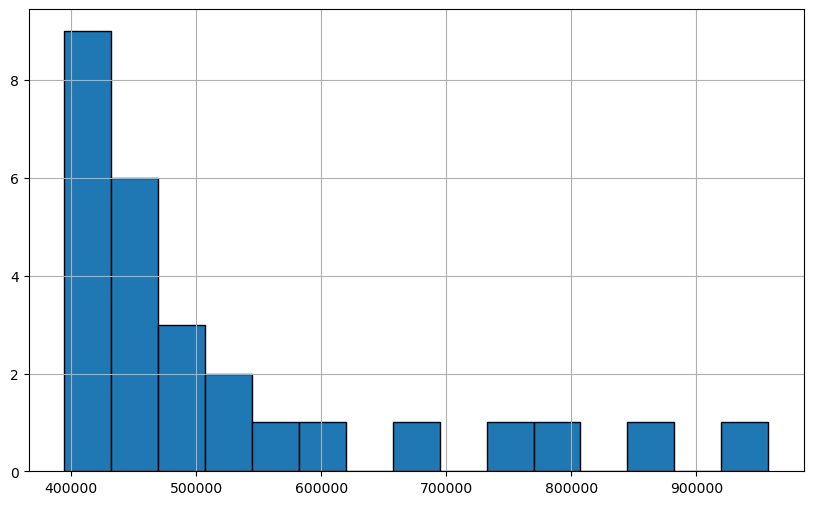

In [7]:
ny_cases = cases[cases["State"] == "NY"]
selected_date_columns = [col for col in ny_cases.columns if '2020-07-01' <= col <= '2020-12-31']
ny_cases = ny_cases[selected_date_columns]

count = 6
weekly_cases_ny = []
for col in ny_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ny.append(ny_cases[col].sum())
weekly_cases_ny_data = pd.Series(weekly_cases_ny)

weekly_cases_ny_data.hist(bins=15, ec='black', figsize=(10, 6))

In [8]:
mean = weekly_cases_ny_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_ny_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_ny_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_ny_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_ny_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 524891.04
The Median is: 458718.00
The Variance is: 23675112441.58
The Skew is: 1.6414
The Kurtosis is: 1.8822

 We have a Skewed right distribution


### New Jersey distribution

<Axes: >

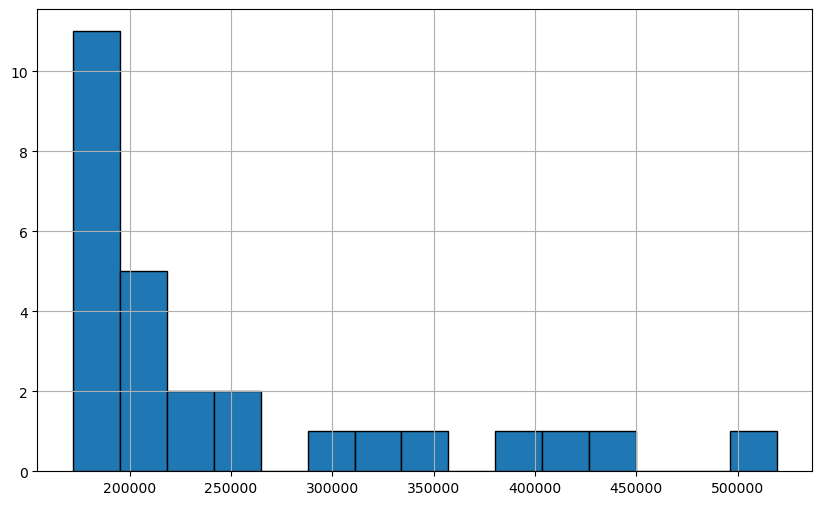

In [9]:
nj_cases = cases[cases["State"] == "NJ"]
selected_date_columns = [col for col in nj_cases.columns if '2020-07-01' <= col <= '2020-12-31']
nj_cases = nj_cases[selected_date_columns]

count = 6
weekly_cases_nj = []
for col in nj_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nj.append(nj_cases[col].sum())
weekly_cases_nj_data = pd.Series(weekly_cases_nj)

weekly_cases_nj_data.hist(bins=15, ec='black', figsize=(10, 6))

In [10]:
mean = weekly_cases_nj_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_nj_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_nj_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_nj_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_nj_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 249087.11
The Median is: 205274.00
The Variance is: 8903494118.49
The Skew is: 1.5736
The Kurtosis is: 1.6678

 We have a Skewed right distribution


### California distribution

<Axes: >

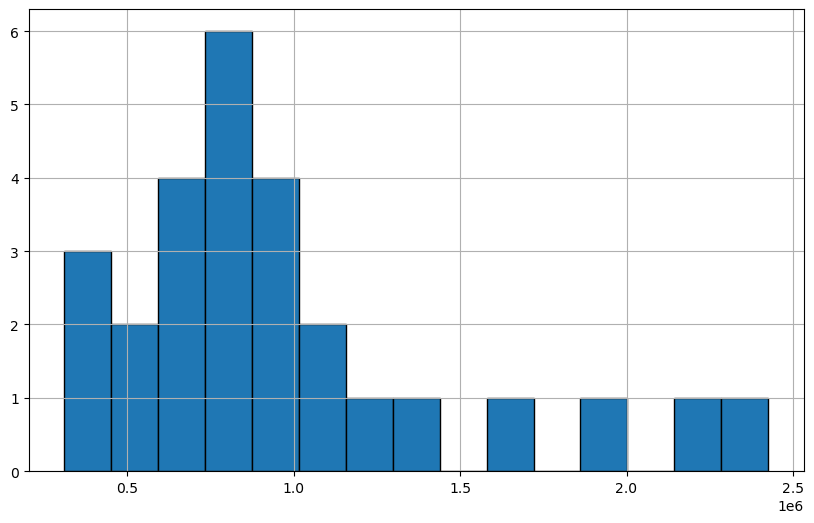

In [11]:
ca_cases = cases[cases["State"] == "CA"]
selected_date_columns = [col for col in ca_cases.columns if '2020-07-01' <= col <= '2020-12-31']
ca_cases = ca_cases[selected_date_columns]

count = 6
weekly_cases_ca = []
for col in ca_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ca.append(ca_cases[col].sum())
weekly_cases_ca_data = pd.Series(weekly_cases_ca)

weekly_cases_ca_data.hist(bins=15, ec='black', figsize=(10, 6))

In [12]:
mean = weekly_cases_ca_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_ca_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_ca_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_ca_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_ca_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 973949.44
The Median is: 834789.00
The Variance is: 271986757653.56
The Skew is: 1.4319
The Kurtosis is: 1.7708

 We have a Skewed right distribution


### Texas distribution

<Axes: >

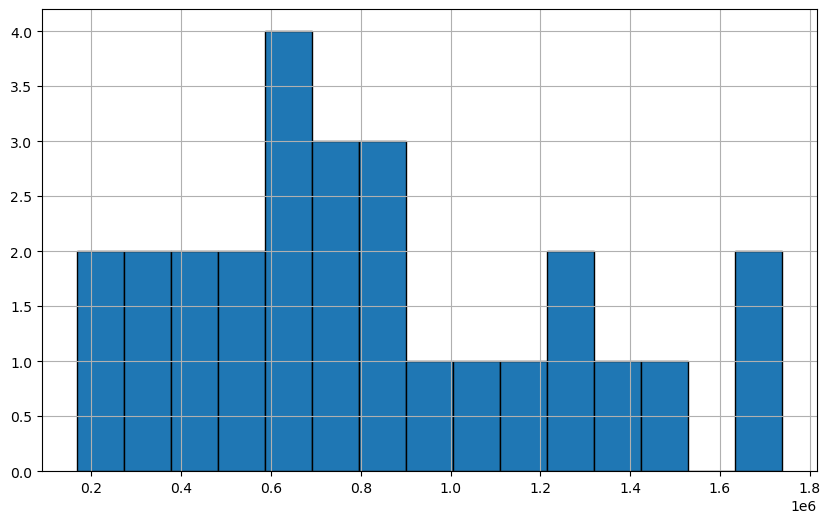

In [13]:
tx_cases = cases[cases["State"] == "TX"]
selected_date_columns = [col for col in tx_cases.columns if '2020-07-01' <= col <= '2020-12-31']
tx_cases = tx_cases[selected_date_columns]

count = 6
weekly_cases_tx = []
for col in tx_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_tx.append(tx_cases[col].sum())
weekly_cases_tx_data = pd.Series(weekly_cases_tx)

weekly_cases_tx_data.hist(bins=15, ec='black', figsize=(10, 6))

In [14]:
mean = weekly_cases_tx_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_tx_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_tx_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_tx_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_tx_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 826769.81
The Median is: 748967.00
The Variance is: 188294610387.85
The Skew is: 0.5457
The Kurtosis is: -0.5038

 We have a Skewed right distribution


### Florida distribution

<Axes: >

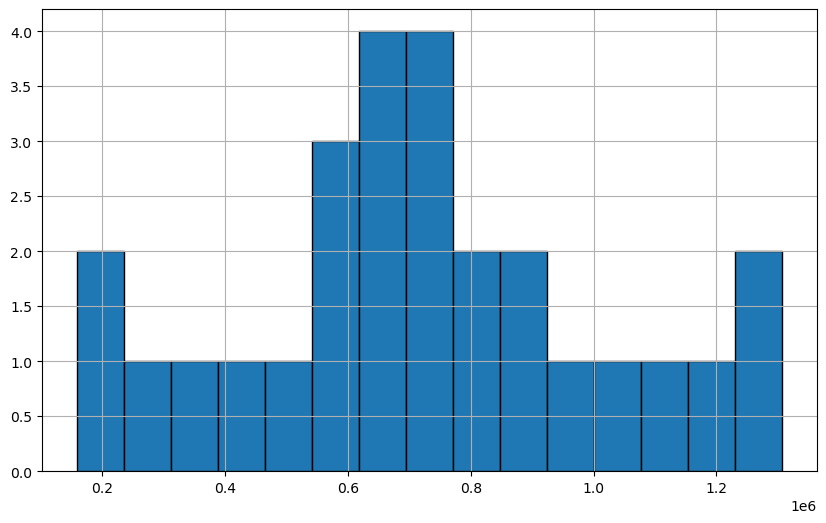

In [15]:
fl_cases = cases[cases["State"] == "FL"]
selected_date_columns = [col for col in fl_cases.columns if '2020-07-01' <= col <= '2020-12-31']
fl_cases = fl_cases[selected_date_columns]

count = 6
weekly_cases_fl = []
for col in fl_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_fl.append(fl_cases[col].sum())
weekly_cases_fl_data = pd.Series(weekly_cases_fl)

weekly_cases_fl_data.hist(bins=15, ec='black', figsize=(10, 6))

In [16]:
mean = weekly_cases_fl_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_fl_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_fl_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_fl_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_fl_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Symmetrical distribution")

The Mean is: 721351.74
The Median is: 706515.00
The Variance is: 84378499800.05
The Skew is: 0.1006
The Kurtosis is: -0.2044

 We have a Symmetrical distribution


__Analysis__: The distributions of mostly all states are the same, Right Skewed, and this implies that each State experinced about the same pattern in the rise of COVID-19 cases.

## Model a poission distribution of COVID-19 cases of North Carolina and compare to other 5 states

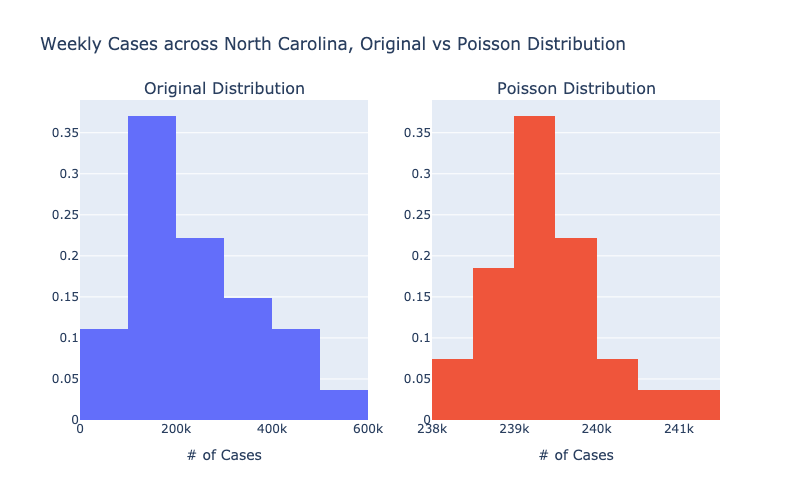

In [17]:
poisson_nc = np.random.poisson(np.mean(weekly_cases_nc_data), len(weekly_cases_nc_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_nc_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nc, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across North Carolina, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_nc.png")
Image(filename="poisson_nc.png")

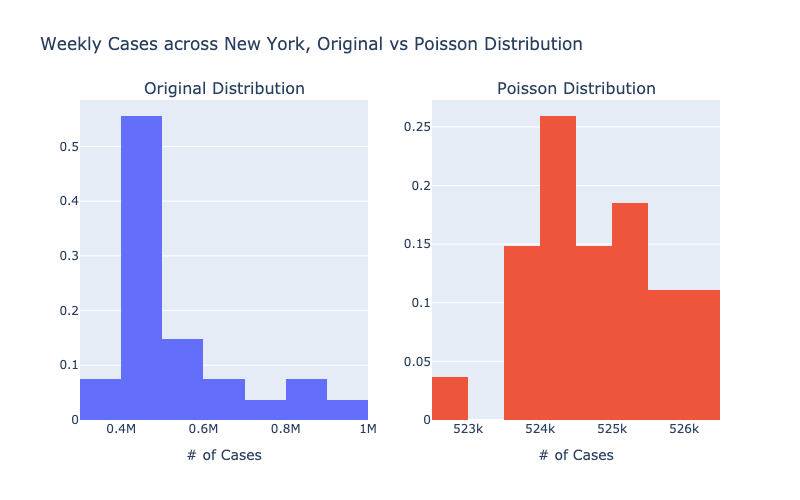

In [18]:
poisson_ny = np.random.poisson(np.mean(weekly_cases_ny_data), len(weekly_cases_ny_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_ny_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ny, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across New York, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_ny.png")
Image(filename="poisson_ny.png")

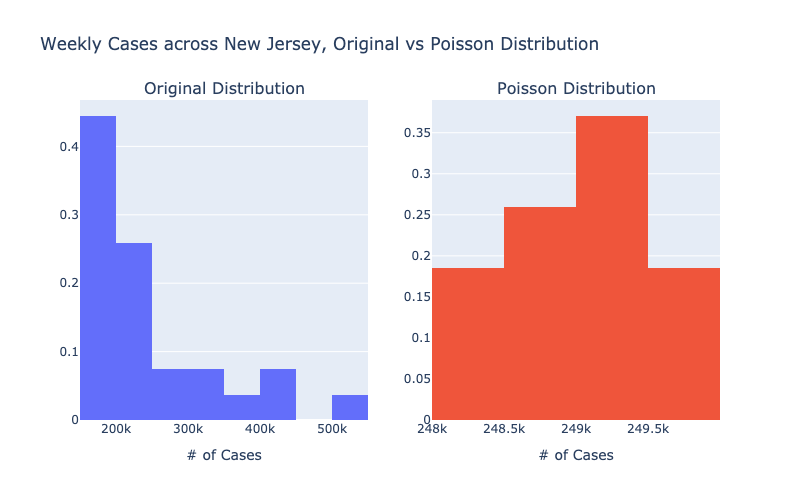

In [19]:
poisson_nj = np.random.poisson(np.mean(weekly_cases_nj_data), len(weekly_cases_nj_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_nj_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nj, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across New Jersey, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_nj.png")
Image(filename="poisson_nj.png")

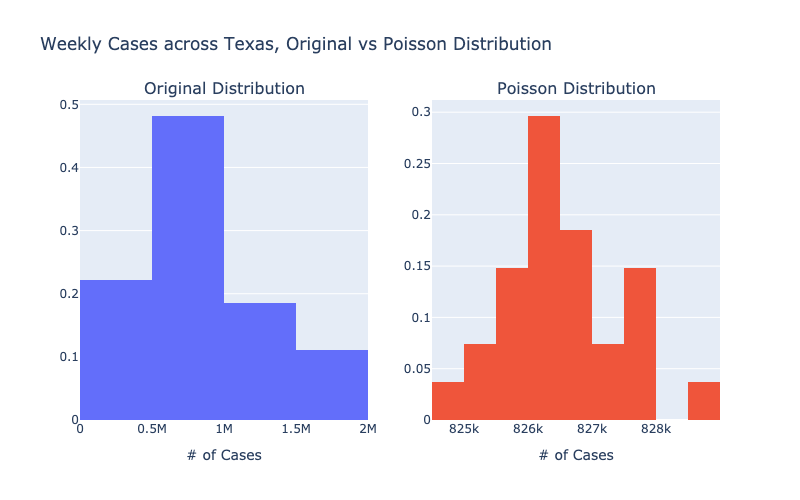

In [20]:
poisson_tx = np.random.poisson(np.mean(weekly_cases_tx_data), len(weekly_cases_tx_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_tx_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_tx, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across Texas, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_tx.png")
Image(filename="poisson_tx.png")

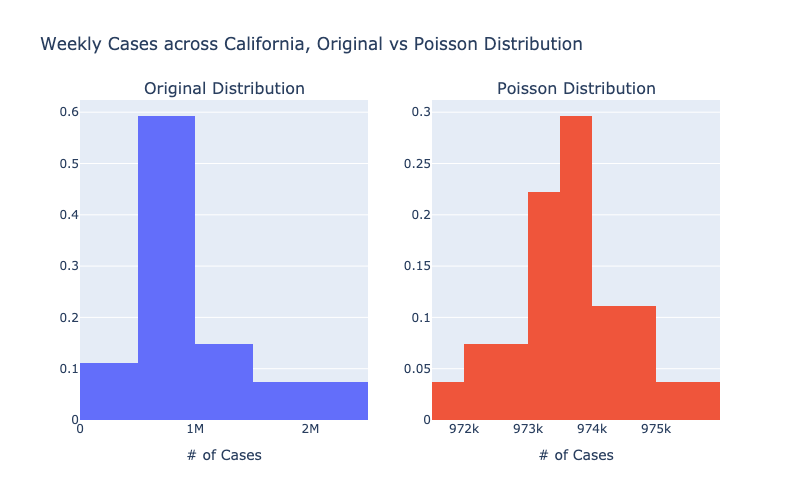

In [21]:
poisson_ca = np.random.poisson(np.mean(weekly_cases_ca_data), len(weekly_cases_ca_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_ca_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ca, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across California, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_ca.png")
Image(filename="poisson_ca.png")

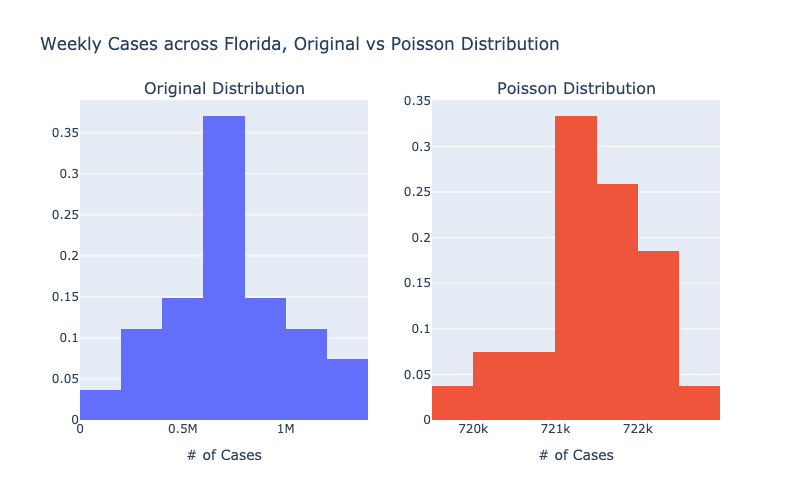

In [22]:
poisson_fl = np.random.poisson(np.mean(weekly_cases_fl_data), len(weekly_cases_fl_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_fl_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_fl, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across Florida, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_fl.png")
Image(filename="poisson_fl.png")

## Model a poission distribution of COVID-19 deaths of North Carolina and compare to other 5 states

In [23]:
deaths = pd.read_csv('../../Team/covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [24]:
nc_deaths = deaths[deaths["State"] == "NC"]
selected_date_columns = [col for col in nc_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
nc_deaths = nc_deaths[selected_date_columns]
nc_deaths.head()

,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,37,37,37,37,37,37,37,37,37,37,...,114,114,114,114,114,114,117,117,117,117
1925,1,1,1,1,1,1,1,1,1,1,...,26,26,26,26,26,26,29,30,30,30
1926,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1927,1,1,1,1,1,1,1,1,1,1,...,19,19,19,19,19,19,23,23,26,26


In [25]:
count = 6
weekly_deaths_nc = [] # where Wednesday from each week is chosen
for col in nc_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nc.append(nc_deaths[col].sum())
weekly_deaths_nc_data = pd.Series(weekly_deaths_nc)

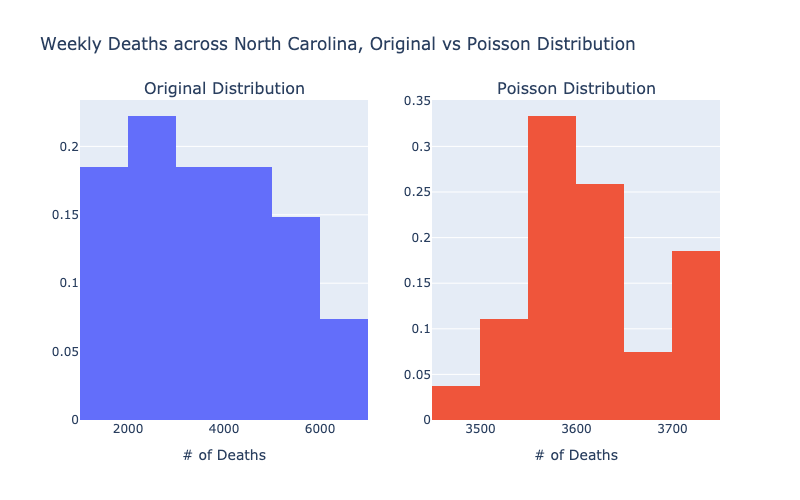

In [26]:
poisson_nc_deaths = np.random.poisson(np.mean(weekly_deaths_nc_data), len(weekly_deaths_nc_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_nc_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nc_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths across North Carolina, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_nc_deaths.png")
Image(filename="poisson_nc_deaths.png")

In [27]:
ny_deaths = deaths[deaths["State"] == "NY"]
selected_date_columns = [col for col in ny_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
ny_deaths = ny_deaths[selected_date_columns]

count = 6
weekly_deaths_ny = [] # where Wednesday from each week is chosen
for col in ny_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ny.append(ny_deaths[col].sum())
weekly_deaths_ny_data = pd.Series(weekly_deaths_ny)

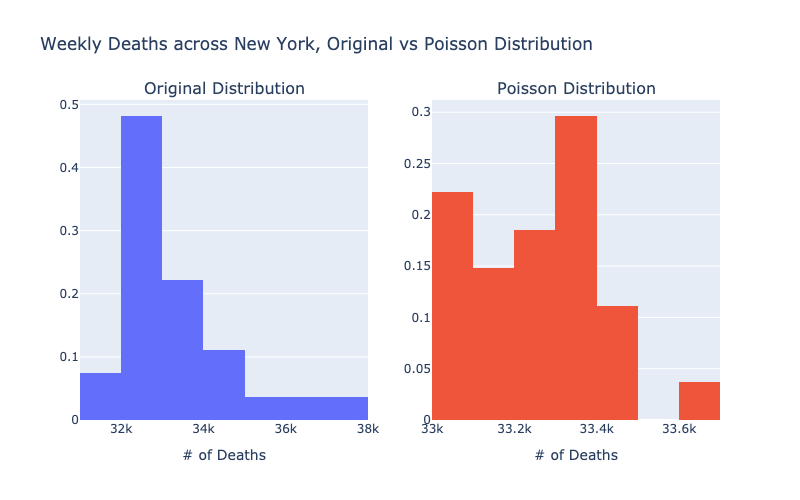

In [28]:
poisson_ny_deaths = np.random.poisson(np.mean(weekly_deaths_ny_data), len(weekly_deaths_ny_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_ny_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ny_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths across New York, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_ny_deaths.png")
Image(filename="poisson_ny_deaths.png")

In [29]:
nj_deaths = deaths[deaths["State"] == "NJ"]
selected_date_columns = [col for col in nj_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
nj_deaths = nj_deaths[selected_date_columns]

count = 6
weekly_deaths_nj = [] # where Wednesday from each week is chosen
for col in nj_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nj.append(nj_deaths[col].sum())
weekly_deaths_nj_data = pd.Series(weekly_deaths_nj)

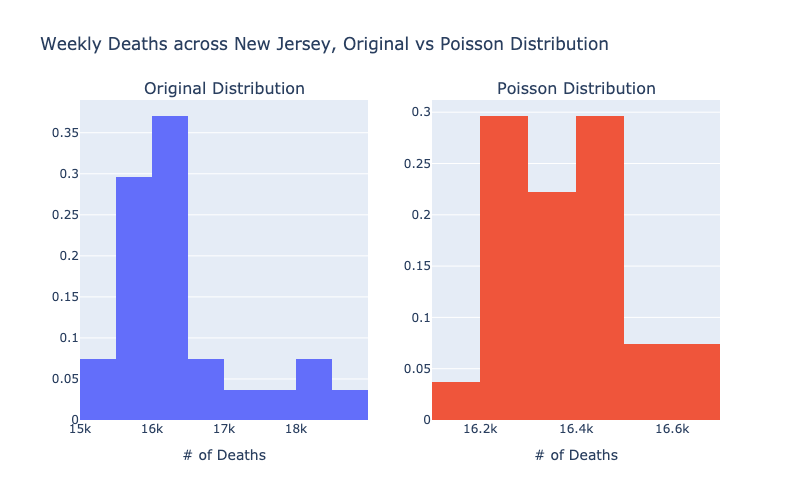

In [30]:
poisson_nj_deaths = np.random.poisson(np.mean(weekly_deaths_nj_data), len(weekly_deaths_nj_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_nj_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nj_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths across New Jersey, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_nj_deaths.png")
Image(filename="poisson_nj_deaths.png")

In [31]:
ca_deaths = deaths[deaths["State"] == "CA"]
selected_date_columns = [col for col in ca_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
ca_deaths = ca_deaths[selected_date_columns]

count = 6
weekly_deaths_ca = [] # where Wednesday from each week is chosen
for col in ca_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ca.append(ca_deaths[col].sum())
weekly_deaths_ca_data = pd.Series(weekly_deaths_ca)

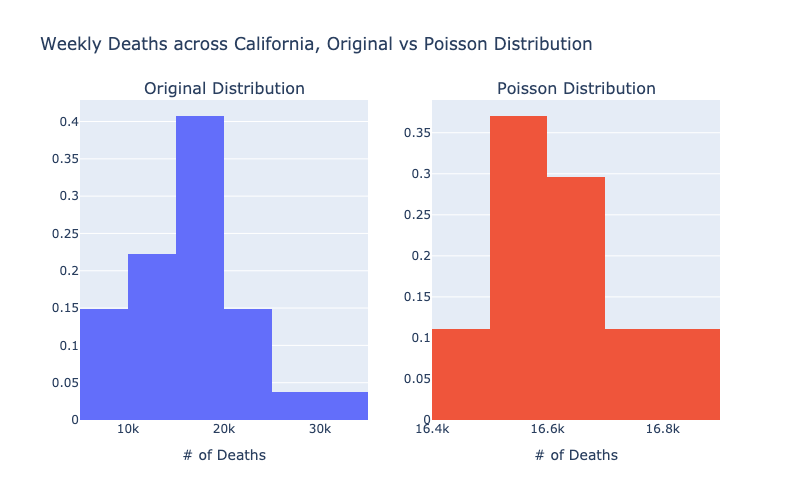

In [32]:
poisson_ca_deaths = np.random.poisson(np.mean(weekly_deaths_ca_data), len(weekly_deaths_ca_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_ca_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ca_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths across California, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_ca_deaths.png")
Image(filename="poisson_ca_deaths.png")

In [33]:
tx_deaths = deaths[deaths["State"] == "TX"]
selected_date_columns = [col for col in tx_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
tx_deaths = tx_deaths[selected_date_columns]

count = 6
weekly_deaths_tx = [] # where Wednesday from each week is chosen
for col in tx_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_tx.append(tx_deaths[col].sum())
weekly_deaths_tx_data = pd.Series(weekly_deaths_tx)

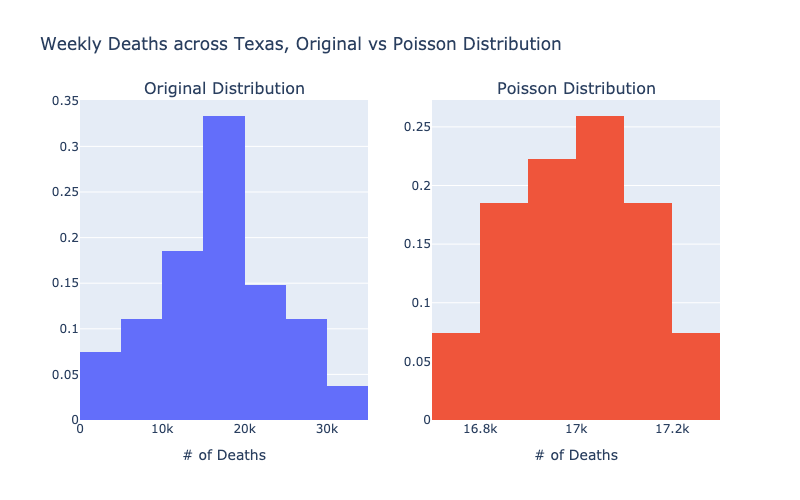

In [34]:
poisson_tx_deaths = np.random.poisson(np.mean(weekly_deaths_tx_data), len(weekly_deaths_tx_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_tx_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_tx_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths across Texas, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_tx_deaths.png")
Image(filename="poisson_tx_deaths.png")

In [35]:
fl_deaths = deaths[deaths["State"] == "FL"]
selected_date_columns = [col for col in fl_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
fl_deaths = fl_deaths[selected_date_columns]

count = 6
weekly_deaths_fl = [] # where Wednesday from each week is chosen
for col in fl_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_fl.append(fl_deaths[col].sum())
weekly_deaths_fl_data = pd.Series(weekly_deaths_fl)

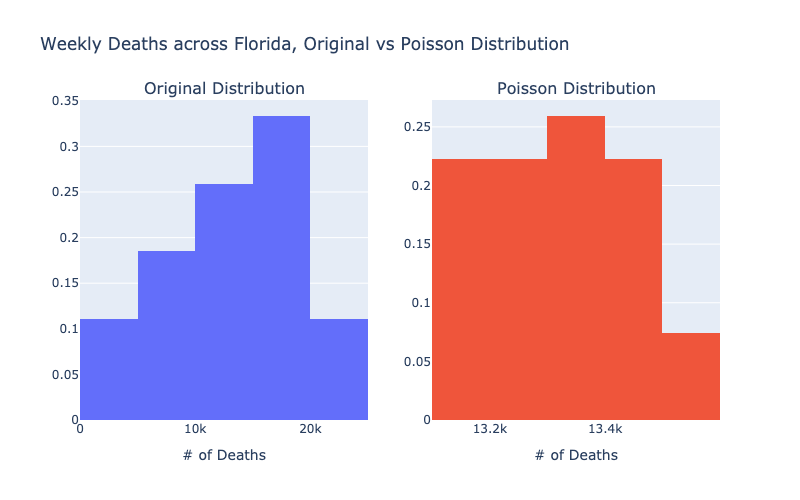

In [36]:
poisson_fl_deaths = np.random.poisson(np.mean(weekly_deaths_fl_data), len(weekly_deaths_fl_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_fl_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_fl_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths across Florida, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("poisson_fl_deaths.png")
Image(filename="poisson_fl_deaths.png")

## How the poisson modeling is different from the first modeling?

While the first modeling is general data visualizing data, Poisson modeling is more specific statistical modeling that assumes data follows a Poisson distribution.

## Perform corelation between Employment data and COVID-19 cases to observe patterns for North Carolina

In [37]:
employment_jul_aug_sep = pd.read_excel('allhlcn203.xlsx')
nc_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "North Carolina"]
nc_employment_jul_aug_sep = nc_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

employment_oct_nov_dec = pd.read_excel('allhlcn204.xlsx')
nc_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "North Carolina"]
nc_employment_oct_nov_dec = nc_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]

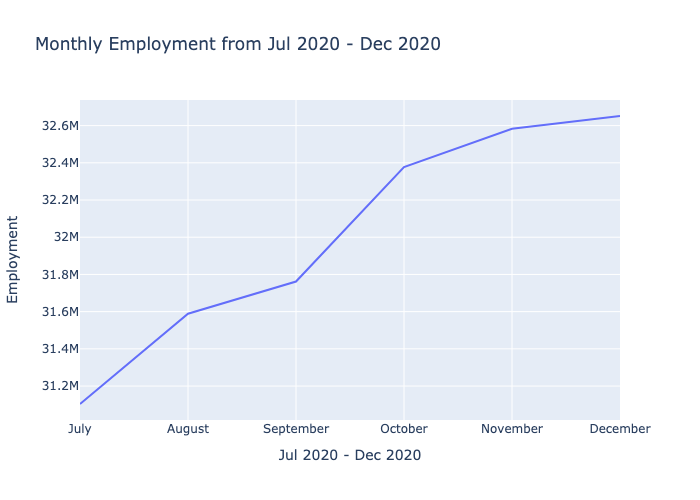

In [38]:
nc_employment_jul = nc_employment_jul_aug_sep["July Employment"].sum()
nc_employment_aug = nc_employment_jul_aug_sep["August Employment"].sum()
nc_employment_sep = nc_employment_jul_aug_sep["September Employment"].sum()

nc_employment_oct = nc_employment_oct_nov_dec["October Employment"].sum()
nc_employment_nov = nc_employment_oct_nov_dec["November Employment"].sum()
nc_employment_dec = nc_employment_oct_nov_dec["December Employment"].sum()

months = ["July", "August", "September", "October", "November", "December"]
employment_sums = [nc_employment_jul, nc_employment_aug, nc_employment_sep, nc_employment_oct, nc_employment_nov, nc_employment_dec]

data = {
    'Jul 2020 - Dec 2020': months,
    'Employment': employment_sums
}

fig = px.line(data, x='Jul 2020 - Dec 2020', y='Employment', title='Monthly Employment from Jul 2020 - Dec 2020')
fig.write_image("employment.png")
Image(filename="employment.png")

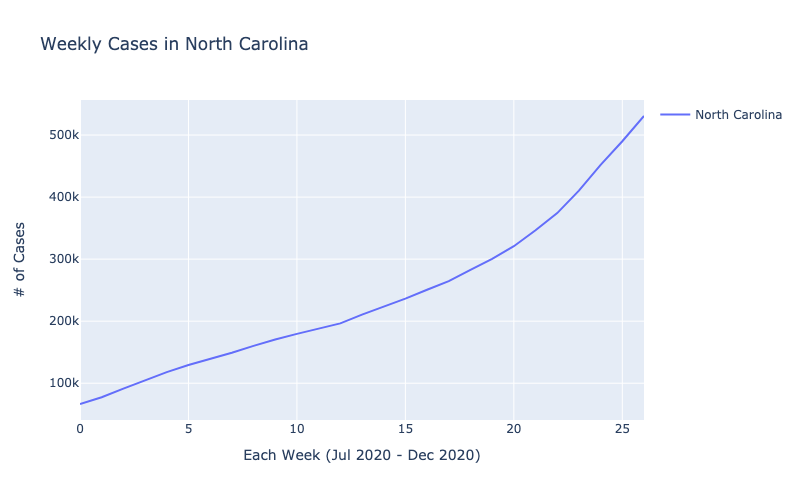

In [39]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_nc_data.index, y=weekly_cases_nc_data,
                         mode='lines', name='North Carolina'))

fig.update_layout(
    title='Weekly Cases in North Carolina',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nc_cases.png")
Image(filename="nc_cases.png")

## Corelations and Patterns?

We would assume that as COVID-19 cases were on the rise, there would be a drastic fall in employment, but our graph shows the opposite. The graph shows that as COVID-19 cases increased from July 2020 to December 2020, employment increased with them. This could be due to couple of reasons, some of them being:

__End of Lockdowns lead to higher COVID-19 cases__: Begining August 2020, mostly all lockdowns were lifted and this let to more and more people being uncautious once gain leading to a surge in spread COVID-19.

__High Employment lead to higher COVID-19 cases__: As the economy was in recovery the employment soared, and more and more cases of COVID-19 were on the rise. From the graphs displayed above, we observe that as the Employement went higher and higher, the number of COVID-19 cases rose more and more.

__Holiday gatherings lead to higher COVID-19 cases__: The Months examined were from July to December, and all these months of High gatherings (i.e., 4th of July, Halloween, Thanksgiving, Christmas). The high gatherings and people being around eachother without caution lead to a spread of COVID-19 as suuported by our graphs.

## Hypothesis

- Due to close proximity between people, the continuously rising employment led to an increase in COVID-19 cases.  
- Rising employment encourages more domestic and international travel, leading to new COVID-19 cases.
- With economy recovering as employment increases, the governments becomes lenient on COVID-19 restrictions leading to new COVID-19 cases.